In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings as ws
ws.filterwarnings("ignore")

In [3]:
#read csv

df = pd.read_csv('ipl2020.csv')

In [4]:
df.head()

user_name     user_location  \
0                     Deepak Ostwal               NaN   
1                    Cricket Mantri             India   
2                      Captain Kane             Earth   
3                  Bhoomish Banewal  New Delhi, India   
4  🏏FlashScore Cricket Commentators            Global   

                                    user_description         user_created  \
0                                                NaN  2017-01-04 13:31:10   
1  8k Followers on Instagram.\nUnbiased, Accurate...  2019-09-02 13:51:04   
2  [ Life long Brendon McCullum, Kane Williamson ...  2011-04-24 09:06:16   
3  I watch a lot of movies and tv shows...and tha...  2013-07-10 11:23:43   
4  Official account of the FlashScore cricket com...  2018-01-24 14:35:45   

   user_followers  user_friends  user_favourites  user_verified  \
0             343           350            61844          False   
1               9             0              164          False   
2             263             0             2051          False   
3              31           121            15897          False   
4           21178           769             4439           True   

                  date                                               text  \
0  2020-09-16 20:47:03  No Ill feeling towards Stokes but I think we w...   
1  2020-09-16 20:46:39  Take a Bow Alex Carey 👏\n\n•The Images/Photos ...   
2  2020-09-16 20:46:19  Seems like memory of you're brain chip already...   
3  2020-09-16 20:42:09  I honestly feel for #morgan . He is a brillian...   
4  2020-09-16 20:41:36  What a summer of cricket we have had!\n\nThank...   

     hashtags               source  is_retweet  
0         NaN  Twitter for Android       False  
1         NaN  Twitter for Android       False  
2         NaN  Twitter for Android       False  
3  ['morgan']  Twitter for Android       False  
4         NaN      Twitter Web App       False

# Dealing with missing values

In [5]:
df.isna().sum()

user_name               0
user_location       14972
user_description     3892
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            11625
source                  1
is_retweet              0
dtype: int64

In [23]:
check_na = (df.isna().sum()/df.shape[0]*100).reset_index().rename(
    columns = {'index': 'columns' , 0:'missing value percentage'})

fig = px.bar(check_na , y='missing value percentage' , x='columns' , 
            text='missing value percentage' , title='Percent of missing\
             values in the columns')

fig.update_traces(texttemplate='${text:.2s}' , textposition='outside')
fig.show()

- Inference: The column user location has the maximum no of missng values. followed by user_description

# Dealing with user location

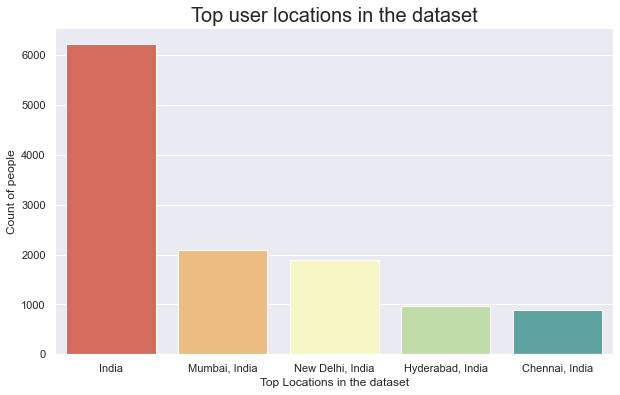

In [24]:
sns.set()

plt.figure(figsize=(10,6))

sns.barplot(data=df.user_location.value_counts()[:5].reset_index(), 
y = 'user_location' , x='index' , palette='Spectral')

plt.ylabel('Count of people')
plt.xlabel('Top Locations in the dataset')
plt.title('Top user locations in the dataset' , size=20)
plt.show()

In [25]:
#for the purpose of eda we will replace the na values of location wit the india

df.user_location.fillna('India' , inplace=True)

In [26]:
df.hashtags.fillna('[IPL2020]' , inplace=True)

In [27]:
df.isna().sum()

user_name              0
user_location          0
user_description    3892
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags               0
source                 1
is_retweet             0
dtype: int64

# Lets begin

In [30]:
#estimate of verififed user


temp = df.user_verified.replace({True: 'Verified' , False:'Non-verified'}).value_counts().reset_index()

fig = px.pie(temp , values='user_verified' ,  names='index' , color_discrete_sequence = px.colors.sequential.RdBu , title='User Status')
fig.show()

In [31]:
#top sources of posting


fig = px.bar(df.source.value_counts()[:10].reset_index() , y='source' , x='index' , text='source' , title='Top sources of posting' , color='index')

fig.show()

In [33]:
#top hashtags

fig  = px.bar(df.hashtags.value_counts()[:10].reset_index() , y='hashtags' , x='index' , text='hashtags' , title='Top trending of hashtags' , color='index')

fig.show()

In [35]:
#scatter plot


fig = px.scatter(data_frame=df ,y='user_favourites' , x='user_followers' , size='user_favourites' , color='user_verified' , log_x=True , size_max=20)
fig.show()

In [36]:
# play with age data

In [37]:
df.user_created

0        2017-01-04 13:31:10
1        2019-09-02 13:51:04
2        2011-04-24 09:06:16
3        2013-07-10 11:23:43
4        2018-01-24 14:35:45
                ...         
53179       11-06-2020 11:06
53180       30-04-2019 04:35
53181       06-03-2016 20:59
53182       29-12-2019 08:42
53183       08-07-2020 22:07
Name: user_created, Length: 53184, dtype: object

In [41]:
#change into day time

d = pd.to_datetime(df.user_created , infer_datetime_format=True)
d

0       2017-01-04 13:31:10
1       2019-09-02 13:51:04
2       2011-04-24 09:06:16
3       2013-07-10 11:23:43
4       2018-01-24 14:35:45
                ...        
53179   2020-11-06 11:06:00
53180   2019-04-30 04:35:00
53181   2016-06-03 20:59:00
53182   2019-12-29 08:42:00
53183   2020-08-07 22:07:00
Name: user_created, Length: 53184, dtype: datetime64[ns]

In [65]:
temp = pd.datetime.now() - d
temp

0       1352 days 19:28:24.673200
1        381 days 19:08:30.673200
2       3434 days 23:53:18.673200
3       2626 days 21:35:51.673200
4        967 days 18:23:49.673200
                   ...           
53179   -50 days +21:53:34.673200
53180    507 days 04:24:34.673200
53181   1567 days 12:00:34.673200
53182    264 days 00:17:34.673200
53183     41 days 10:52:34.673200
Name: user_created, Length: 53184, dtype: timedelta64[ns]

In [72]:
int(str(temp[0]).split()[0])//365

3